<a href="https://colab.research.google.com/github/OsbornOuO/stock_ml_exercise/blob/master/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

In [2]:
import finlab_crypto
finlab_crypto.setup()

|------------------------------
| Google Drive not connected!  
|------------------------------
|
| Please connect google drive:
Mounted at /content/drive


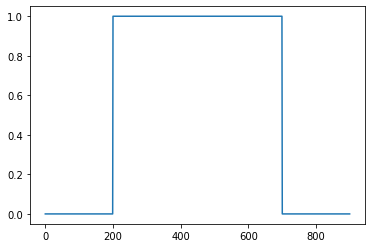

In [3]:
import pandas as pd
s = pd.Series([0]*200+[1]*500+[0]*200)

s.plot()

In [4]:
from finlab_crypto import indicators

indicators??

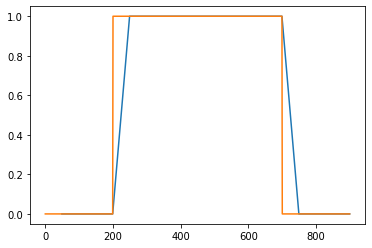

In [8]:
trend = indicators.trends['sma'](s,50)
trend.plot()
s.plot()

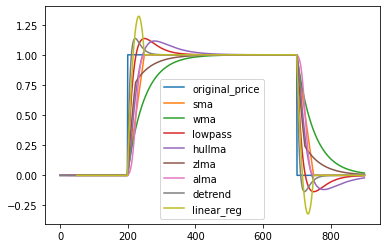

In [9]:
filter_result = pd.DataFrame()
filter_result['original_price'] = s

for name, func in indicators.trends.items():
  trend = func(s,50)
  filter_result[name] = trend

filter_result.plot() 

In [10]:
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT","4h")

All caught up..!


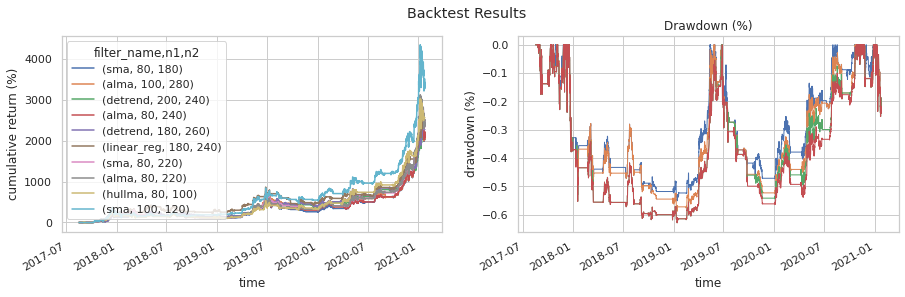

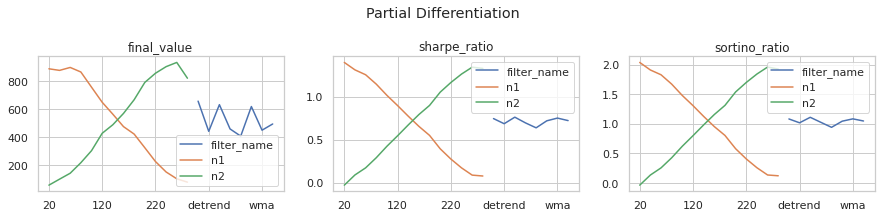

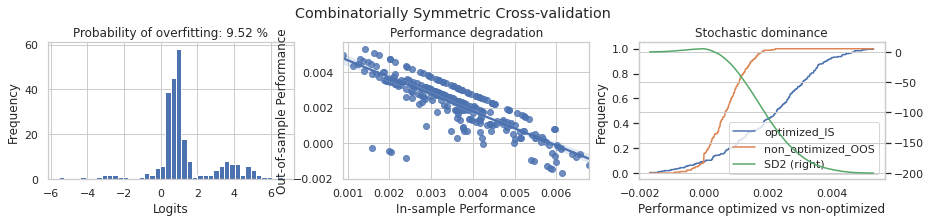

Output()

In [22]:
from finlab_crypto import Strategy

@Strategy(filter_name='sma',n1=20,n2=60)
def trend_strategy(ohlcv):
  fn = trend_strategy.filter_name
  v1 = trend_strategy.n1
  v2 = trend_strategy.n2

  close = ohlcv.close
  sma20 = indicators.trends[fn](close,v1)
  sma60 = indicators.trends[fn](close,v2)

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  return entries, exits

import numpy as np
variables = {
    'filter_name': list(indicators.trends.keys()),
    'n1': np.arange(20,300,20),
    'n2': np.arange(20,300,20)
}

trend_strategy.backtest(ohlcv,variables=variables, freq='4h',plot=True)

